# Task_2 : Titanic Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df= pd.read_csv("/Users/jaini/Desktop/Data_science/tested.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data Source: Kaggle

0:Dead, 1: Survived

### Data visualization

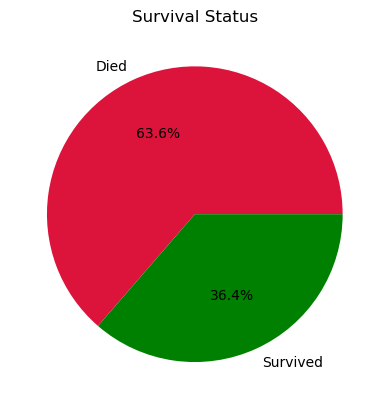

In [4]:
plt.pie(
    df['Survived'].value_counts().sort_values(ascending=False),
    labels = ['Died','Survived'],
    colors=["Crimson", "Green"],
    autopct="%1.1f%%",
)
plt.title('Survival Status')
plt.show()

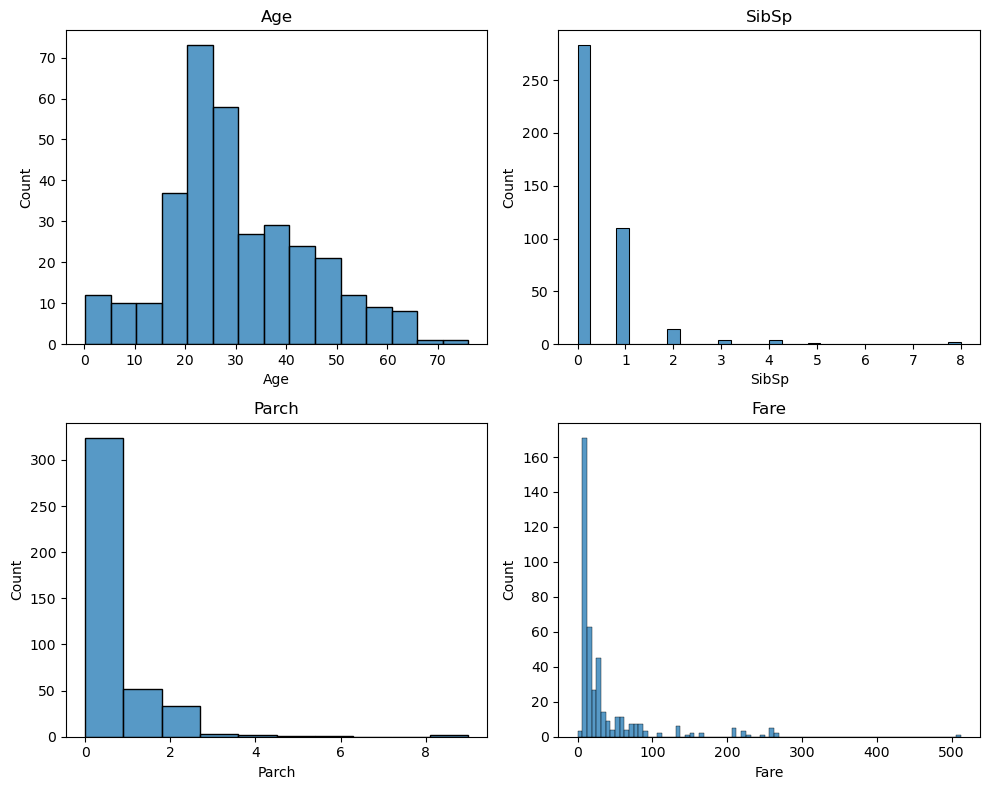

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sns.histplot(data=df, x='Age', ax = axes[0,0]).set_title('Age')
sns.histplot(data=df, x='SibSp', ax = axes[0,1]).set_title('SibSp')
sns.histplot(data=df, x='Parch', ax = axes[1,0]).set_title('Parch')
sns.histplot(data=df, x='Fare', ax = axes[1,1]).set_title('Fare')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Number of Passengers in different class.')

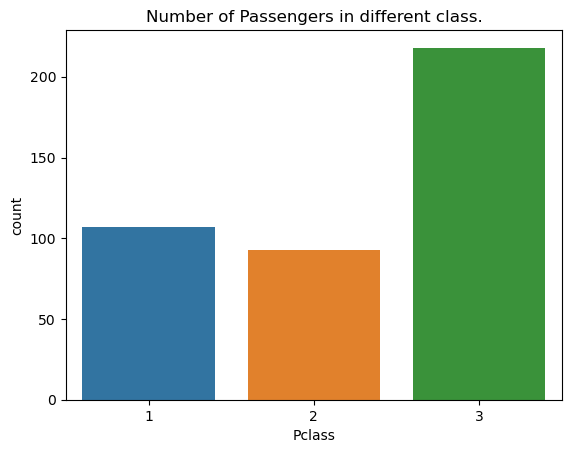

In [6]:
sns.countplot(x = 'Pclass', data = df).set_title('Number of Passengers in different class.')

Text(0.5, 1.0, 'Number of Passengers in different class of both Male and Female')

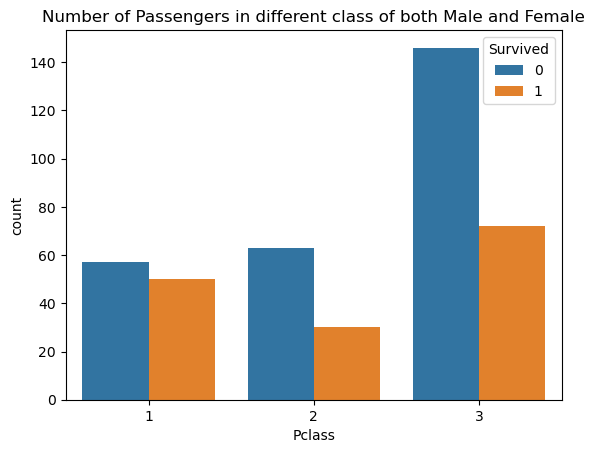

In [7]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df).set_title('Number of Passengers in different class of both Male and Female')

In [8]:
numerical_features = df.select_dtypes(include = ['float64','int64']).columns.to_list()
categorical_features = df.select_dtypes(exclude = ['float64','int64']).columns.to_list()

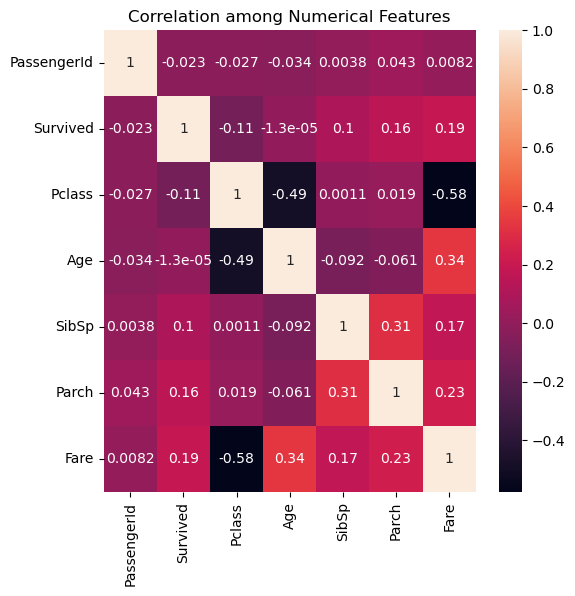

In [9]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True).set_title('Correlation among Numerical Features')
plt.show()

### Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Cabin has many null values,thus dropping it

In [12]:
df = df.drop(columns = 'Cabin')

In [13]:
df.shape

(418, 11)

In [14]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [15]:
df['Fare'].fillna(df['Fare'].mean(), inplace = True)

In [16]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()
#Dealt with all the missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

### Feature Extraction and Modeling

In [21]:
X = df.drop(columns=['Name','Ticket','PassengerId', 'Survived','Sex','Embarked'])

In [22]:
y = df['Survived']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 40)

In [24]:
#Preprocessing for feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
model =LogisticRegression()

In [26]:
model.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

### Model Evaluation

In [29]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [30]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.6309523809523809
Confusion Matrix:
[[49  4]
 [27  4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.92      0.76        53
           1       0.50      0.13      0.21        31

    accuracy                           0.63        84
   macro avg       0.57      0.53      0.48        84
weighted avg       0.59      0.63      0.56        84

